# Antisocial Online Behavior Detection. Reduction using Locally linear embeddings 

In [1]:
import pandas as pd
import numpy as np


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE, locally_linear_embedding

Using TensorFlow backend.


In [2]:
train = pd.read_csv("./data/train.csv.zip")
test  = pd.read_csv("./data/test.csv.zip")
labels = pd.read_csv("./data/test_labels.csv.zip")

In [3]:
DEVELOP = True

In [4]:
test                = test.merge(labels, how="left", on="id")
test['used_for_sc'] = test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) >= 0 
train['used_for_sc']= 1
test_labelled       = test[test.used_for_sc==True]
test_unlabelled     = test[test.used_for_sc!=True]

In [5]:
df = pd.concat([train, test_labelled], axis=0)
df = df[['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df['status'] = df['toxic'].astype('str') + df['severe_toxic'].astype('str') + df['obscene'].astype('str') + \
                df['threat'].astype('str') + df['insult'].astype('str') + df['identity_hate'].astype('str')
df['status'] = df['status'].astype('int')
labels = df['status']
if DEVELOP:
    df = df[:1000]
    labels = labels[:1000]

In [6]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(df.comment_text.values)
train_X = tokenizer.texts_to_sequences(df.comment_text.values)
train_X = pad_sequences(train_X, maxlen=400, padding='post')

Text(0.5, 1.0, 'Reduced to 2D using LLE')

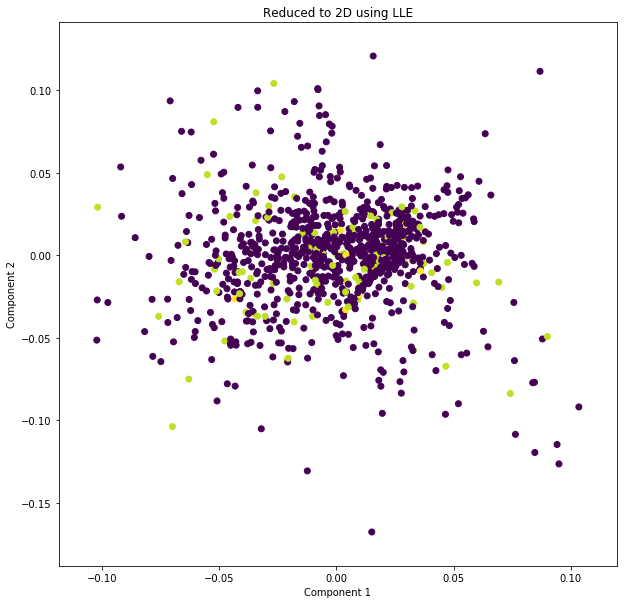

In [51]:
lle = locally_linear_embedding(train_X, n_components=2, n_neighbors=10)
lle = lle[0]
fig = plt.figure(figsize=(10, 10))
plt.scatter(lle[:,0], lle[:,1], marker='o', c=labels)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')